# **Aircraft Engine Remaining Useful Life Prediction Model**
## PSTAT 131 Final Project | Billy Dang
---

<img src="https://i.ytimg.com/vi/zN7h8OezfXI/maxresdefault.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 70%;" />


## **Project Introduction**
The following project will delve into the world of aviation, more specifically: engine upkeep and maintainence. With recent viral [news](https://www.cbsnews.com/news/boeing-737-max-engine-fix-tammy-duckworth/) on Boeing engine issues, namely on its 737 MAX 10 model, aviation safety has time and time again been called into [question](https://www.cnn.com/2024/01/30/business/boeing-history-of-problems/index.html). While the [data](https://www.npr.org/2024/03/12/1237262132/why-flying-safe-united-airlines-boeing#:~:text=Globally%2C%20commercial%20plane%20accidents%20and,going%20down%20over%20the%20years.) shows that flights now are safer than ever before, diagnosing and identifying possible critical failures **before** they occur is essential in maintaining this level of security. Within this project, the aim is to develop a machine learning model that will accurately predict the remaining useful life (RUL) left on an aircraft engine given an array of sensor and setting information. By being able to forecast an engine's RUL, companies are able to provide preventative maintenance at appropiate times. Ideally, the model will prevent unnecessary maintainence checks that may keep aircrafts on the ground, leading to possible flight delays and lost revenue. On the otherhand, it will flag upcoming engine errors before significant issues arise. This will allow businesses to not only save time, money, and lives.


## **Market Overview & Context** 

"A jet engine is the most important part of a commercial airplane and repairing them has become a $58 billion dollar business."
        (Source: Aerodynamic Advisory)
    
Commercial jet engines are complex pieces of machinery that undergo extreme stress and pressure during each flight cycle. Constant wear and tear on the parts of these engines lead to a need for an overhaul: where worn and damaged parts are disassembled and replaced. A typical overhaul could range from 4 - 5 million dollars on the lower end, but oftentimes exceed $10 million. The repair costs aren't the only problem as before the supply chain issues (pre-pandemic) a typical narrowbody engine took anywhere from 60 - 75 days to overhaul. Now, there are cases where overhauls can take over 200 days. These lengthy repair times put a great deal of strain on the flight industry as passengers are flying in [record numbers](https://www.tsa.gov/news/press/releases/2024/06/24/tsa-breaks-record-most-individuals-screened-single-day-readies). As a result of this, we see that stock prices for many engine makers (GE, RYCEY, SAF.PA, RTX) skyrocketing as the aircraft maintenance & repair industry continues to grow. So while supply chain and labor issues may persist, the goal of this project is to ensure planes are going into maintenance at appropriate times - to not bottleneck a process that has already been stretched to its limits.

<img src="https://a57.foxnews.com/static.foxbusiness.com/foxbusiness.com/content/uploads/2018/02/931/506/eb99e24d-boeing-buildingkm.jpg?ve=1&tl=1" style="display: block; margin-left: auto; margin-right: auto; width: 70%;" />

## Exploratory Data Analysis | About the Data
---
This project will work with NASA's __[*Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation*](https://data.nasa.gov/Raw-Data/PHM-2008-Challenge/nk8v-ckry/about_data)__ dataset which is publicly availible on their [open data website](https://data.nasa.gov/) and seeks to describe the degradation of an aircraft engine after each cycle before it reaches failure (where the max cycle value given an engine ID is the point of failure). The dataset consists of multiple multivariate time series observations with various sensor information and is already split into three .csv files. These files were originally split into one for training our models (train.csv), one to test our models (test.csv) and a final one that includes the true remaining useful life for each engine in the test set (truth.csv). However, for this project, I will be combining the train & test set in order to perform my own stratified sampling of train/test split. Stratified sampling is performed to ensure that the sampling process maintains the same proportion of different of subgroups in the test/train sample as they appear in the overall population. This will make our datasets more robust to bias from random sampling. I will also need to add the RUL value onto both train and test files as the outcome variable is not explicitly listed. The datasets will be kept separate as the necessary transformations to add 'rul' would be rather complicated if they were combined right away. A general look into the 1 portion of the training dataset can be seen below:

In [1037]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np

In [1039]:
#Load in both the Datasets
engine_data_1 = pd.read_csv("data/train.csv")
engine_data_2 = pd.read_csv("data/test.csv")
#Look at values in Dataset_1
engine_data_1

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [1041]:
engine_data_2

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


Taking a look at the raw training data tells us a couple things. First, we see that there are 20,631 and 13,096 observations within the 1st and 2nd dataset respectively. Both have the same 26 features. Among these features we see an "**id**" variable that identifies which engine it is, a **cycle** variable indicating the current cycle, 3 different settings for which the engines were set at, and 21 different sensors (**s1 - s21**). The id variable tells us that there are 100 total engines within the dataset to work with.

### Handling Missing Values
With the sheet amount of variables that are availible, we'll identify any missing values that may exist within this data and handle them below. Depending on the type of missing information, we may use a Linear regression imputation: a statistical method that uses a linear regression model to predict and replace missing values in a dataset.

In [1045]:
#Checking for missing values
missing_values_1 = engine_data_1.isnull().sum() 
if missing_values_1.sum() == 0:
    print("No Missing Values in Dataset 1")
missing_values_2 = engine_data_2.isnull().sum() 
if missing_values_2.sum() == 0:
    print("No Missing Values in Dataset 2")

No Missing Values in Dataset 1
No Missing Values in Dataset 2


Out of the 20,631 entries within the first dataset, and 13,096 entries in the second dataset, there are no missing/null values across all variables so no imputation will be needed. 

### Data Transformation 
By now, it may be obvious that there two significant issues with the dataset we are working with. First, **Remaining Useful Life (RUL)**- our target variable - is not explicitly provided as mentioned earlier. Here, we'll add another column to our dataset that identifies the highest cycle number for each engine id, and subtract that engine's current cycle number to find our value. This transformation will give us a clear indicator of how much life is left in each engine at any given cycle.

Secondly, the feature names within the dataset, labeled as s1, s2, etc., are generic and provide no context. Such labels can turn our model into a sort of 'black box', where even if the model performs well, it offers limited insight into the actual factors that indicate engine degredation. After delving deeper to find the dataset's [documentation](https://c3.ndc.nasa.gov/dashlink/static/media/publication/2008_IEEEPHM_CMAPPSDamagePropagation.pdf), the appropriate names and units measurements were found and will be added to the dataset.

#### Adding RUL Variable

In [1050]:
#Creating target variable 
engine_data_1['rul'] = engine_data.groupby('id')['cycle'].transform(max) - engine_data['cycle']
#pd.options.display.max_rows = 200 to check above function (Commented out for now)

#Visualize change below
engine_data_1.head(5)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


#### Renaming Sensor Labels
Adding the proper labels will provide more context to what each sensor ir trying to tell us, allowing for a more systematic approach to diagnosing the issue and possible preventative measures that can take place. While my personal domain knowledge is currently limited in this field, being thorough will allow me to expand upon this knowledge and derive more interpretable results. Attached below is a diagram of what some of the available sensors are referencing and further documentation can be found [here](https://c3.ndc.nasa.gov/dashlink/static/media/publication/2008_IEEEPHM_CMAPPSDamagePropagation.pdf):


<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10845-022-02015-x/MediaObjects/10845_2022_2015_Fig3_HTML.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%;" />

In [1054]:
labels_adjust = {
    's1': 'fan_inlet_temp', 's2': 'lpc_outlet_temp', 's3': 'hpc_outlet_temp',
    's4': 'lpt_outlet_temp', 's5': 'fan_inlet_pressure', 's6': 'bypass_duct_pressure',
    's7': 'hpc_outlet_pressure', 's8': 'physical_fanspeed', 's9': 'physical_corespeed',
    's10': 'engine_pressure_ratio', 's11': 'hpc_outlet_static_pressure', 's12': 'fuelflow_ps30_ratio',
    's13': 'corrected_fanspeed', 's14': 'corrected_corespeed', 's15': 'bypass_ratio',
    's16': 'burner_fuelair_ratio', 's17': 'bleed_enthalpy', 's18': 'demanded_fanspeed',
    's19': 'demanded_corrected_fanspeed', 's20': 'hpt_coolant_bleed', 's21': 'lpt_coolant_bleed'
}
engine_data_1.rename(columns = labels_adjust, inplace = True)
engine_data_1.head(1)

,id,cycle,setting1,setting2,setting3,fan_inlet_temp,lpc_outlet_temp,hpc_outlet_temp,lpt_outlet_temp,fan_inlet_pressure,...,corrected_fanspeed,corrected_corespeed,bypass_ratio,burner_fuelair_ratio,bleed_enthalpy,demanded_fanspeed,demanded_corrected_fanspeed,hpt_coolant_bleed,lpt_coolant_bleed,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.419,191


#### Applying Appropriate Changes to Engine Dataset #2
Before moving on, let's apply the necessary changes to dataset #2 and do similar adjustments in order to prepare it for merging down. These changes are simply to fix feature headers, rename overlapping engine id's, and implement our target variable.

In [1057]:
#Load in Label dataset
rul_data = pd.read_csv("data/truth.csv")

#Attach max remaining useful life to 2nd dataset
engine_data_2 = engine_data_2.merge(rul_data, on = 'id', how = 'left')

#Rename columns like in 1st dataset
engine_data_2.rename(columns = {
    'cycle_x': 'cycle',
    'cycle_y': 'max_RUL'}, inplace = True)

#Calculate the RUL based on the max RUL from truth.csv and how many cycles have already been run
engine_data_2['rul'] = (engine_data_2.groupby('id')['cycle'].transform(max) + engine_data_2["max_RUL"]) - engine_data_2['cycle']

#Drop max_RUL column as no longer needed
engine_data_2 = engine_data_2.drop('max_RUL', axis = 1)

#Rename sensor readings like in 1st dataset
engine_data_2.rename(columns = labels_adjust, inplace = True)
engine_data_2.head(1)

,id,cycle,setting1,setting2,setting3,fan_inlet_temp,lpc_outlet_temp,hpc_outlet_temp,lpt_outlet_temp,fan_inlet_pressure,...,corrected_fanspeed,corrected_corespeed,bypass_ratio,burner_fuelair_ratio,bleed_enthalpy,demanded_fanspeed,demanded_corrected_fanspeed,hpt_coolant_bleed,lpt_coolant_bleed,rul
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142


In [1059]:
#Ensure that the id column is an integer
engine_data_2['id'] = engine_data_2['id'].astype(int)

#Map the ids from 1-100 to 101-200 by adding 100 to each id
engine_data_2['id'] = engine_data_2['id'] + 100

#Ensure that the id column remains an integer
engine_data_2['id'] = engine_data_2['id'].astype(int)
engine_data_2.head(2);

In [1061]:
#Concatenate engine_data_1 and engine_data_2
combined_data = pd.concat([engine_data_1, engine_data_2], ignore_index=False)
combined_data

,id,cycle,setting1,setting2,setting3,fan_inlet_temp,lpc_outlet_temp,hpc_outlet_temp,lpt_outlet_temp,fan_inlet_pressure,...,corrected_fanspeed,corrected_corespeed,bypass_ratio,burner_fuelair_ratio,bleed_enthalpy,demanded_fanspeed,demanded_corrected_fanspeed,hpt_coolant_bleed,lpt_coolant_bleed,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,200,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,24
13092,200,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,23
13093,200,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,22
13094,200,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,21


### Data visualization 
Given these our cleaned dataset and new sensor labels, what are some notable features that engineers (or anyone interested in the aerospace domain) should be looking at? Well based on context provided by [A NASA Guide to Engines](https://www.spilve.lv/library/construction/A%20NASA%20Guide%20to%20Engines.pdf), we can make inferences on which sensors may hold valuable information on degredation based on if those sensors are measuring parts of the engine that undergo extreme stress during flight - where 'stress' and corrosion will often go hand in hand with extreme temperatures. Employing this methodology provides some initial predictions. For example, features that relate to the engine fans may not be as important as the compressor portions of the engine due to the far higher temparatures that compressors reach during flight relative to their fan counterparts. We'll create visualizations to validate our theories above, possibly discover any new relationships between features, while also checking to see if some assumptions of mechanistic models (i.e. linear regression) are met.

In [1064]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution of Engine Lifecycles / RUL
In the next couple graphs we'll explore the distribution of our target variable (RUL) across the engines within our dataset. While we have over 30,000 observations to work with, it is important to note that there exists only 200 unique engines in the dataset. I'll expand more on the possible challenges of this below, but for now we'll start with a plot of max RUL (the highest # of cycles run) before each engine reaches failure.

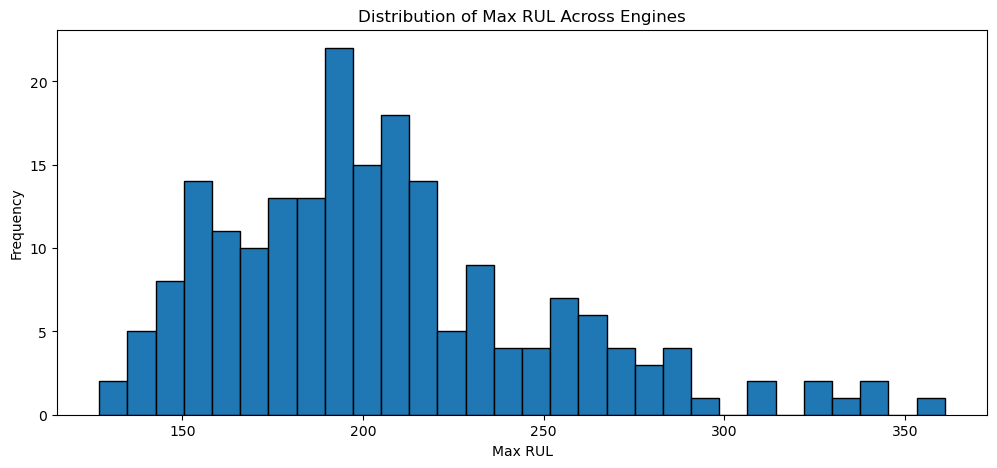

In [1067]:
#Group by engine id and calculate the maximum RUL
max_rul_per_engine = combined_data.groupby('id')['rul'].max().reset_index()

#Plot histogram
plt.figure(figsize=(12, 5))
plt.hist(max_rul_per_engine['rul'], bins=30, edgecolor='black')
plt.title('Distribution of Max RUL Across Engines')
plt.xlabel('Max RUL')
plt.ylabel('Frequency');

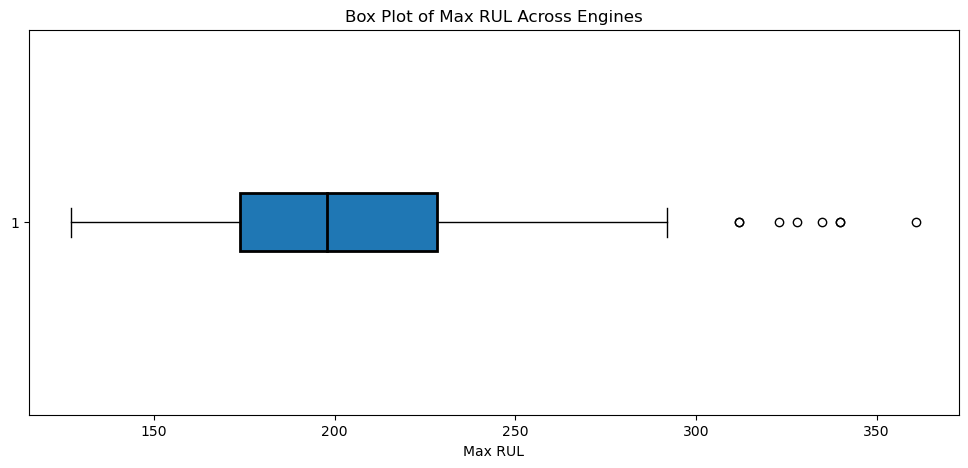

In [1068]:
#Graphing Boxplot 
plt.figure(figsize=(12, 5))
plt.boxplot(max_rul_per_engine['rul'], vert=False, patch_artist=True,  # Fill the box with color
            boxprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2)
           )
plt.title('Box Plot of Max RUL Across Engines')
plt.xlabel('Max RUL');

Examining the distribution of the max cycles engines can go through before failure reveals that the data is skewed right with most of our engines falling within the 175 - 225 cycle range.  However there are quite a couple outlier engines that surpass this mark which may negatively affect our models' ability to accurately predict RUL. These outliers stretch out as far as 361 cycles (only ~15% of engines make it past 250) and thus widen the range for inference for our models. By looking at the standard deviation and variance values as well, it is clear the models may "struggle" with this particular dataset. Another detail about the dataset that may compound this issue is the time-series-esque nature in which we are predicting the RUL of an engine. We aren't simply making predictions on an engine once, but rather across hundreds of cycles. Thus the issue mentioned above - in which an over prediction due to the wide range of influence - would likely compound on itself overtime. 

In [1072]:
variance_rul = max_rul_per_engine['rul'].var()
std_dev_rul = max_rul_per_engine['rul'].std()
range_rul = combined_data['rul'].max() - combined_data['rul'].min()

print(f"Range of MAX RUL: {range_rul}")
print(f"Variance of Max RUL: {variance_rul}")
print(f"Standard Deviation of Max RUL: {std_dev_rul}")

Range of MAX RUL: 361
Variance of Max RUL: 2033.4060050251264
Standard Deviation of Max RUL: 45.0933033279347


#### Correlation Matrix
Below is a correlation matrix with the following features removed due to having a correlation value less than .05 (across all features): id, Setting1, Setting2, Setting3, fan inlet temperature, fan inlet pressure, engine pressure ratio, burner fuel/air ratio, demanded fan speed, and demanded corrected fanspeed. The original matrix with those features will not be shown for brevity.

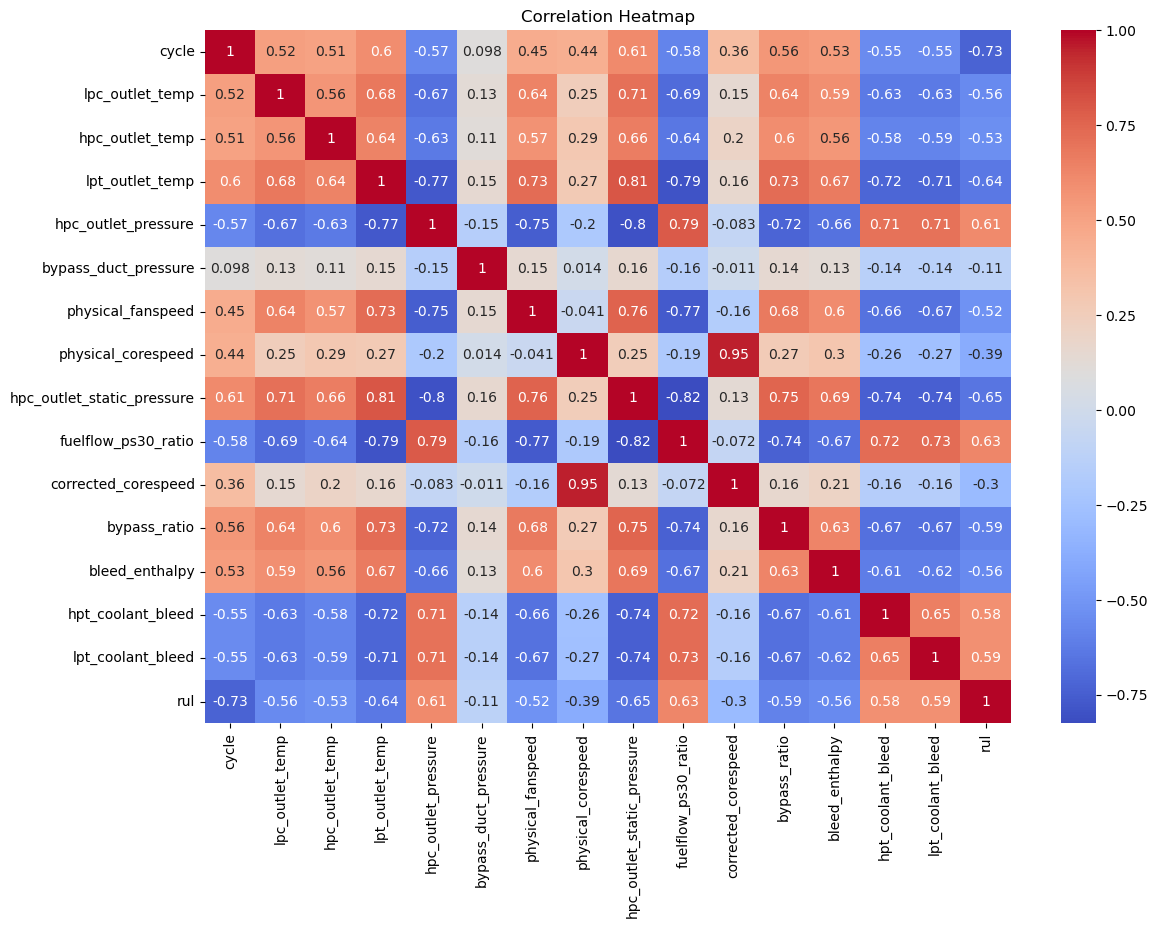

In [1075]:
corr_columns = ['cycle', 'lpc_outlet_temp', 'hpc_outlet_temp', 'lpt_outlet_temp', 'hpc_outlet_pressure', 'bypass_duct_pressure',
                'physical_fanspeed', 'physical_corespeed', 'hpc_outlet_static_pressure', 'fuelflow_ps30_ratio', 'corrected_corespeed', 'bypass_ratio',
                'bleed_enthalpy', 'hpt_coolant_bleed', 'lpt_coolant_bleed', 'rul']
adj_corr_matrix = combined_data[corr_columns].corr()
plt.figure(figsize = (13, 9))
sns.heatmap(adj_corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap");

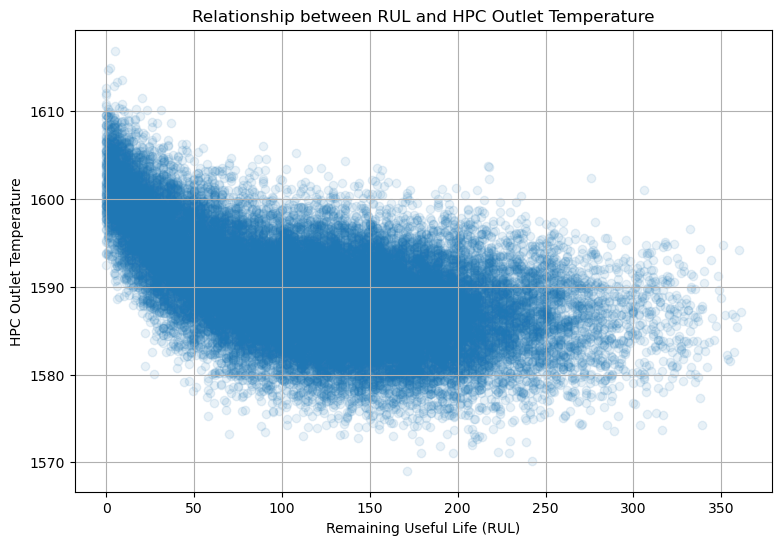

In [1076]:
plt.figure(figsize = (9, 6))
plt.scatter(combined_data['rul'], combined_data['hpc_outlet_temp'], alpha = .1)
plt.title('Relationship between RUL and HPC Outlet Temperature')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('HPC Outlet Temperature')
plt.grid(True)

Within the correlation matrix and scatterplot above, we see many complex relationships between features (amongst themselves and the target variable). Notable features include the temperature and pressure readings around the compression chamber within the engine (where we see an negative correlation between temp. & RUL, and a possitive corrlation between hpt_outlet_pressure & RUL). The physical fan speed, bypass ratio, bleed enthapy also have a negative correlation with RUL, suggesting many possibilities:
- **Physical Fanspeed**: the rotational speed of the fan in the engine - an increasing fan speed due to declining engine health may suggests damage to the blades and bearing, and that the engine is working harder to maintain performance 
- **Bleed enthalpy**: refering to the excess, compressed air the engine extracts to use for various purposes such as de-icing - a negative correlation suggests that higher energy extraction may be indicative of increased engine workload due to inefficiency
- **Bypass Ratio**: the ratio of the mass flow rate of air bypassing the engine core (through the fan) to the mass flow rate passing though the engine core - the negative correlation suggests that while higher bypass ratios are generally more efficient, it could be an adaptive mechanism to maintain efficiency as the engine degrades.

There are a couple more features that show some form of correlation with RUL that this report won't particularly expand upon. Backtracking to the features removed from the graph above, we won't remove features from the dataset simply for having a low correlation score with the target variable. Since correlation is just a measure of some linear relationship between two variables, there may still exist some information within the feature. However, we will remove constant features from the model as features with no or low variability rarely constitute useful predictors.

C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


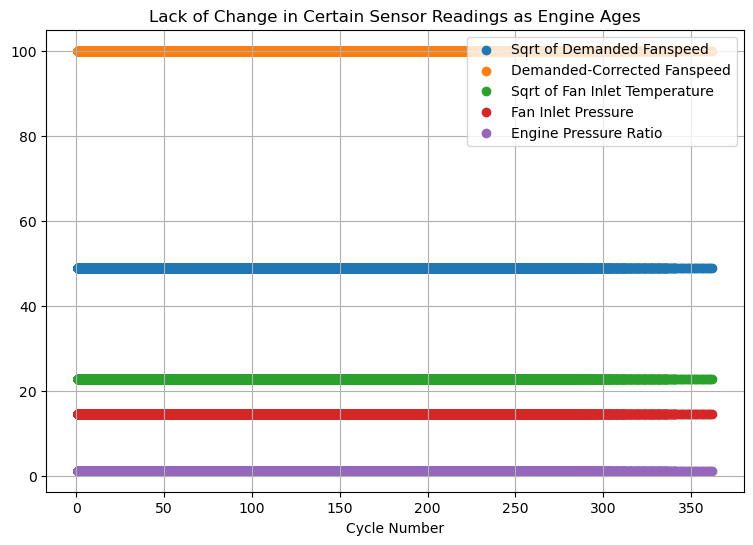

In [1080]:
plt.figure(figsize=(9,6))
plt.scatter(combined_data['cycle'], np.sqrt(combined_data['demanded_fanspeed']), label='Sqrt of Demanded Fanspeed')
plt.scatter(combined_data['cycle'], combined_data['demanded_corrected_fanspeed'], label='Demanded-Corrected Fanspeed')
plt.scatter(combined_data['cycle'], np.sqrt(combined_data['fan_inlet_temp']), label='Sqrt of Fan Inlet Temperature')
plt.scatter(combined_data['cycle'], combined_data['fan_inlet_pressure'], label='Fan Inlet Pressure')
plt.scatter(combined_data['cycle'], combined_data['engine_pressure_ratio'], label='Engine Pressure Ratio')
plt.title("Lack of Change in Certain Sensor Readings as Engine Ages"), plt.xlabel("Cycle Number"), plt.legend(), plt.grid(True);

#### Removing Constant Features
As the scatterplot reveals, the lack of any change within the omitted sensors as the engine progresses towards failure means that it does not contribute much useful information for prediction. As such we will be remiving the following features from consideration in the training & testing dataset: 
- Setting3, fan_inlet_temperature, fan_inlet_pressure, engine_pressure_ratio, burner_fuel_air_ratio, demanded_fan_speed, and demanded_corrected_fanspeed, and ID (since it's simply the identifier variable).

*Notice, the fanspeed readings were square rooted simply to condense the graph, the distribution remains horizontal with or without this factor.

In [522]:
clean_features = ['cycle', 'setting1', 'setting2', 'lpc_outlet_temp', 'hpc_outlet_temp', 'lpt_outlet_temp', 'hpc_outlet_pressure', 'bypass_duct_pressure',
                'physical_fanspeed', 'physical_corespeed', 'hpc_outlet_static_pressure', 'fuelflow_ps30_ratio', 'corrected_corespeed', 'bypass_ratio',
                'bleed_enthalpy', 'hpt_coolant_bleed', 'lpt_coolant_bleed', 'rul']
#engine_data = engine_data.drop(columns = ['id', 'setting3'], axis = 1)
combined_data = combined_data[clean_features]
combined_data.head(1)

,cycle,setting1,setting2,lpc_outlet_temp,hpc_outlet_temp,lpt_outlet_temp,hpc_outlet_pressure,bypass_duct_pressure,physical_fanspeed,physical_corespeed,hpc_outlet_static_pressure,fuelflow_ps30_ratio,corrected_corespeed,bypass_ratio,bleed_enthalpy,hpt_coolant_bleed,lpt_coolant_bleed,rul
0,1,-0.0007,-0.0004,641.82,1589.7,1400.6,554.36,21.61,2388.06,9046.19,47.47,521.66,8138.62,8.4195,392,39.06,23.419,191


### Stratified Sampling: Train / Test Split
Now it's time to prepare the data for our models. We'll be using a stratified sampling technique that uses quantile-based binning to separate the train/test data. This method ensures that there is a more balanced and accurate representation of the population distribution within the sampled dataset. After separating the data into a training & testing split, we'll use k-fold cross validation to split our training dataset further as a means to evaluate the performance of our model more accurately.

In [563]:
from sklearn.model_selection import train_test_split

#Splitting features & Target Variable
X = combined_data.drop('rul', axis=1)
y = combined_data['rul']

#Bin the target variable using quantiles (10)
y_binned = pd.qcut(y, q=10, labels=False) 

#Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned, random_state=3)

## Model Building 
---
Now it's time to start building and fitting our regression models. To evaluate the performance of our models, we'll be using Mean Absolute Error (MAE) and Normalized Mean Absolute Error (n-MAE) as the metric. MAE is used as it gives us an easily interpretable metric for our model. It essentially describes the average error between the predicted value and the actual values of RUL. Meanwhile, n-MAE provides a measure on our error relative to the range of our data. It is especially important to have this metric in considereation for our dataset as the predictor variable range is over 300, causing regular MAE to seem extremely high relative to other estimations. As such, we'll be aiming to minimize the both MAE and thus n-MAE, while being mindful of overfitting our models.

##### **Performance Evaluation Metrics Summary:**
- **MAE**: Gives us a rather strightforward, interpretable measurement of predicted vs. actual RUL error
- **n-MAE**: MAE fails to take into account the relative range of our predictor variable, n-MAE gives us an interpretable metric that accounts for this scale

Note: There is a significant limitation to this approach which is the lack of consideration for negative errors (over-predicting RUL) as we take the absolute value of inaccuracies. This could have extremely dangerous implications as over-predicting RUL can lead to critical failures that costs lives.

#### Data Scaling & Centering 
Before fitting the model and running our evaluation metrics, we'll scale and center our data. We do this to prevent features with larger scales from disproportionately influencing the learning process (which is especially important for algoriths that rely on distance metrics). This is done AFTER splitting our data in order to avoid data leakage and thus will be performed on the test dataset separately.

In [561]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

#Implement scaling to test/train set
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

### Linear Regression Model 

In [726]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#Defining L-Reg Model
lr_model = LinearRegression()

#Employing K-fold CV on L-Reg Model w/ 10 folds
neg_mae_cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

#Convert negative MAE scores to Normalized MAE scores
mae_cv_scores_lr = -neg_mae_cv_scores_lr
nmae_cv_scores_lr = np.sqrt(-neg_mae_cv_scores_lr)/range_rul

#Storing Values for documentation / Plot and Print scores below
lr_mae = 32.06289449072714
lr_mae_SD = 0.5071310917658022
lr_nmae_mean =  0.11444840363980287

Linear Regression Mean MAE: 32.06289449072714
Standard Deviation of the MAE: 0.5071310917658022
Mean Normalized-MAE: 0.08881688224578155


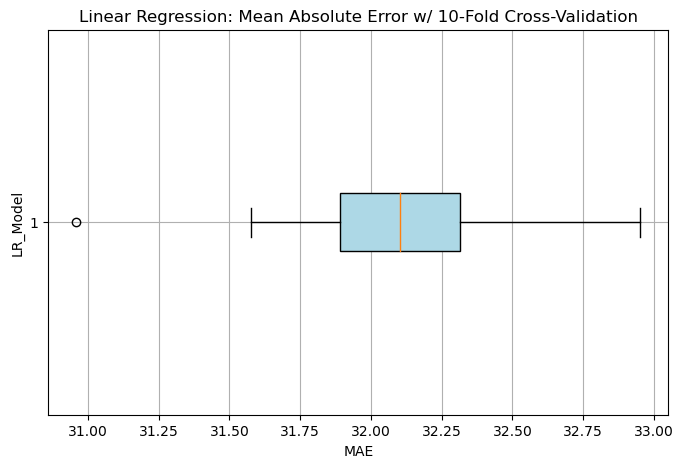

In [731]:
#Plot & Print results
plt.figure(figsize = (8,5)), plt.boxplot(mae_cv_scores_lr, vert = False, patch_artist=True,  boxprops=dict(facecolor='lightblue'))
plt.title('Linear Regression: Mean Absolute Error w/ 10-Fold Cross-Validation'), plt.ylabel('LR_Model'), plt.xlabel('MAE'), plt.grid(True);
print(f"Linear Regression Mean MAE: {mae_cv_scores_lr.mean()}")
print(f"Standard Deviation of the MAE: {mae_cv_scores_lr.std()}")
print(f"Mean Normalized-MAE: {mae_cv_scores_lr.mean()/range_rul}")

For our linear regression model, we see a mean absolute error of ~32 RUL cycles with a standard deviation of roughly .5 which tells us that the model may be struggling with the dataset due to the sheer amount of features, alongside the complexity. While a mean absolute error of 32 cycles is certainly not ideal, the low standard deviation atleast means our model is relatively consistent; combining that with an average normalized-MAE of ~8.89 tells us the model is able to still capture a good deal of variability (with an error % of around 9% of the possible range). A big portion of the models struggle may be that with 17 features, there exists relationships between these variables that do not meet the assumptions required for an effective linear model (i.e. independence of errors and homoskedascity). For this reason, I will avoid using models such as elastic net, that while combines both lasso and ridge regularization to boost performance, is still fundamentally a linear model that will most likely not achieve ideal metrics. 
___

### K-Nearest Neighbors Model 

The KNN model will be tuned on the following hyperparameters:
- **Number of Neighbors:** # of points used for regression (1-30), where a lower value makes the model more sensitive to local variations but a higher value results in smoother predictions and possible overfitting
- **Weight:** Whether all points have equal influence ('uniform') or closer points have more influence ('distance')
- **Metric:** Which formula used to measure distance between points, different metrics can capture different spatial relationships in the data.

In [771]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
#Defining the KNN model & the parameter grid for tuning
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
#Grid search for MAE value & Fit the grid search to the data
grid_search_mae_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='neg_mean_absolute_error')
grid_search_mae_knn.fit(X_train_scaled, y_train)

#Calculate & extract the results for plotting MAE
best_score_mae_knn = -grid_search_mae_knn.best_score_
mae_results_knn = pd.DataFrame(grid_search_mae_knn.cv_results_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}
Best MAE & n-MAE score: 28.296000736771283 | 0.07838227350906173


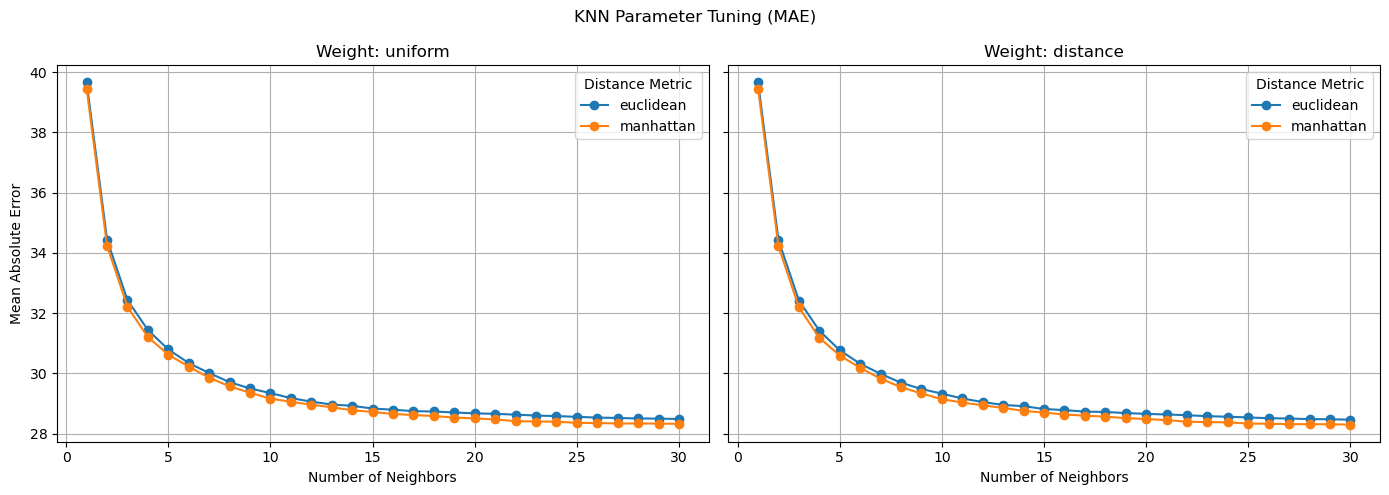

In [891]:
#Plot & print results knn
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for i, weight in enumerate(param_grid_knn['weights']): #Loop over weight metrics
    ax = axes[i]  #Select the subplot 
    for metric in param_grid_knn['metric']:  #Loop over distance metrics
        mask = (mae_results_knn['param_weights'] == weight) & (mae_results_knn['param_metric'] == metric)
        subset = mae_results_knn[mask]
        mae_scores = -subset['mean_test_score']
        n_neighbors_values = subset['param_n_neighbors'] 
        ax.plot(n_neighbors_values, mae_scores, marker='o', label=f'{metric}')
    ax.set_xlabel('Number of Neighbors')
    ax.set_title(f'Weight: {weight}')
    ax.grid(True)
    ax.legend(title='Distance Metric')
axes[0].set_ylabel('Mean Absolute Error'), fig.suptitle('KNN Parameter Tuning (MAE)'), plt.tight_layout(), plt.grid(True)
print("Best parameters:", grid_search_mae.best_params_)
print(f"Best MAE & n-MAE score: {best_score_mae_knn} | {best_score_mae_knn/range_rul}")

After running our K-Nearest neighbors model we see using the Manhattan distance metric with 30 neighbors yielded the best results with the lowest MAE being ~28.29. Both distance curces track each other nearly identically across the entire range of neighbors. We see the most significant improvements in model performance within the 1 - 10 neighbor range before seeing significant improvement drop offs beyond 10 neighbors. While 30 neighbors achieved the lowest MAE score within our hyperparameter tuning, the computational cost - performance trade off may not be worth it in many cases, and may actually be overfitting our model.
____

### Random Forest Model

The Random forest model will be tuned on the following hyperparameters:
- **Number of Estimators:** Sets the # of decision trees in the forest, more trees generally improve performance but come with high computational cost
- **Maximum Ddepth:** Limits the depth of trees, controlling how specific each tree can be. Shallow trees prevent overfitting by making more general predictions at the cost of not being able to capture complex patterns as effectively
- **Maximum Features:** Sets the # of features the model considers at each split, where lower values may reduce overfitting

In [936]:
from sklearn.ensemble import RandomForestRegressor
#Defining the RF model & the parameter grid for tuning
rf_model = RandomForestRegressor(random_state=3)
param_grid_rf = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [2, 4, 8, 10],
    'max_features': [None, 'sqrt']
}

#Grid search for MAE value & Fit the grid search to the data
grid_search_mae_rf = GridSearchCV(rf_model, param_grid_rf, cv=10, scoring='neg_mean_absolute_error')
grid_search_mae_rf.fit(X_train_scaled, y_train)

#Calculate & extract the results for plotting MAE
best_score_mae_rf = -grid_search_mae_rf.best_score_
mae_results_rf = pd.DataFrame(grid_search_mae_rf.cv_results_)

Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 400}
Best MAE & n-MAE Score: 27.1760 | 0.07527980828884322


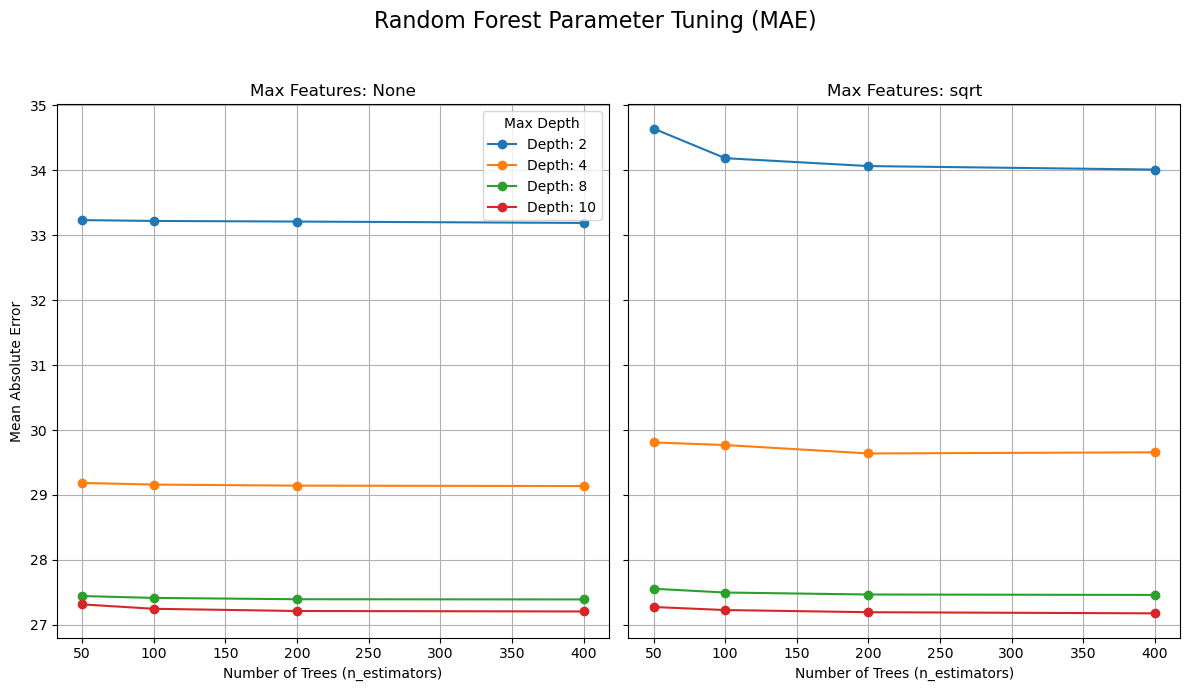

In [978]:
fig, axes = plt.subplots(1, len(param_grid_rf['max_features']), figsize=(12, 7), sharey=True)
for i, max_feature in enumerate(param_grid_rf['max_features']):
    ax = axes[i]
    for max_depth in param_grid_rf['max_depth']:
        if max_feature is None:
            mask = (mae_results_rf['param_max_features'].isnull()) & (mae_results_rf['param_max_depth'] == max_depth)
        else:
            mask = (mae_results_rf['param_max_features'] == max_feature) & (mae_results_rf['param_max_depth'] == max_depth)
        subset = mae_results_rf[mask]
        mae_scores = -subset['mean_test_score']  
        n_estimators_values = subset['param_n_estimators']
        ax.plot(n_estimators_values, mae_scores, marker='o', label=f'Depth: {max_depth}')
    ax.set_xlabel('Number of Trees (n_estimators)')
    ax.set_title(f'Max Features: {max_feature if max_feature is not None else "None"}')
    ax.grid(True)
axes[0].set_ylabel('Mean Absolute Error')
fig.suptitle('Random Forest Parameter Tuning (MAE)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
axes[0].legend(title='Max Depth', loc='best')

print(f"Best Parameters for Random Forest: {grid_search_mae_rf.best_params_}") 
print(f"Best MAE & n-MAE Score: {best_score_mae_rf:.4f} | {best_score_mae_rf/range_rul}")

After running our Random forests models we see that when using a max depth of 10, sqrt max feature, and 400 estimators, we're able to achieve the lowest training error score. With a MAE and n-MAE of 27.1760 & 0.075279 respectively, the RF model is the "best" model so far. Some key takeaways from the results are that max depth played a significant role in lowering training error, with the biggest improvements going from 2 to 4, and then 4 - 8. There were still improvements using a depth of 10, but it was far less significant and whether the tradeoff for additional computational resources is worth it is debatable. We also see slight improvements in increasing the number of decision trees as well, though not as significant as expected with relatively similar performance beyond 200 trees. Taking all this into consideration. we'll be using a similar ensemble method called Gradient Boosting for our next model to further refine our results. Unlike Random Forests, where each tree(s) are built independently, Gradient Boosting allows for each tree to correct the errors made by previous ones. We'll only use the 'sqrt' max_feature to cut down on computation time as it was the best parameter for our RF model.
____

### Gradient Boosting Tree Model

The Gradient Boosting model will be tuned on the following hyperparamters:
- **Number of Estimators:** Sets the # of decision trees in the forest - same considerations as the random forest model
- **Max Depth:** Sets the # of features the model considers at each split - same considerations as the random forest model
- **Learning Rate:** Controls how much each tree contributes to the final prediction. A lower learning rate may make the more learn more slowly but can improve generalization - typically combined with a higher number of trees to optimize performance.
- **Max Features:** For our GBR model, we'll use the most effective feature in our Random Forest model ('Sqrt') based on the results above and to save on computation time & resources

In [857]:
from sklearn.ensemble import GradientBoostingRegressor
#Defining the Gradient Boosting Regressor model & the parameter grid for tuning
gbr_model = GradientBoostingRegressor(random_state=3)
param_grid_gbr = {
    'n_estimators': [100, 200, 400], 
    'max_depth': [4, 6, 8], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_features': ['sqrt'],  #Use best max_features from random forest model
}

#Grid search for MAE value & Fit the grid search to the data
grid_search_mae_gbr = GridSearchCV(gbr_model, param_grid_gbr, cv=10, scoring='neg_mean_absolute_error')
grid_search_mae_gbr.fit(X_train_scaled, y_train)

#Calculate the best MAE score & Extract the results for plotting MAE
best_score_mae_gbr = -grid_search_mae_gbr.best_score_
mae_results_gbr = pd.DataFrame(grid_search_mae_gbr.cv_results_)

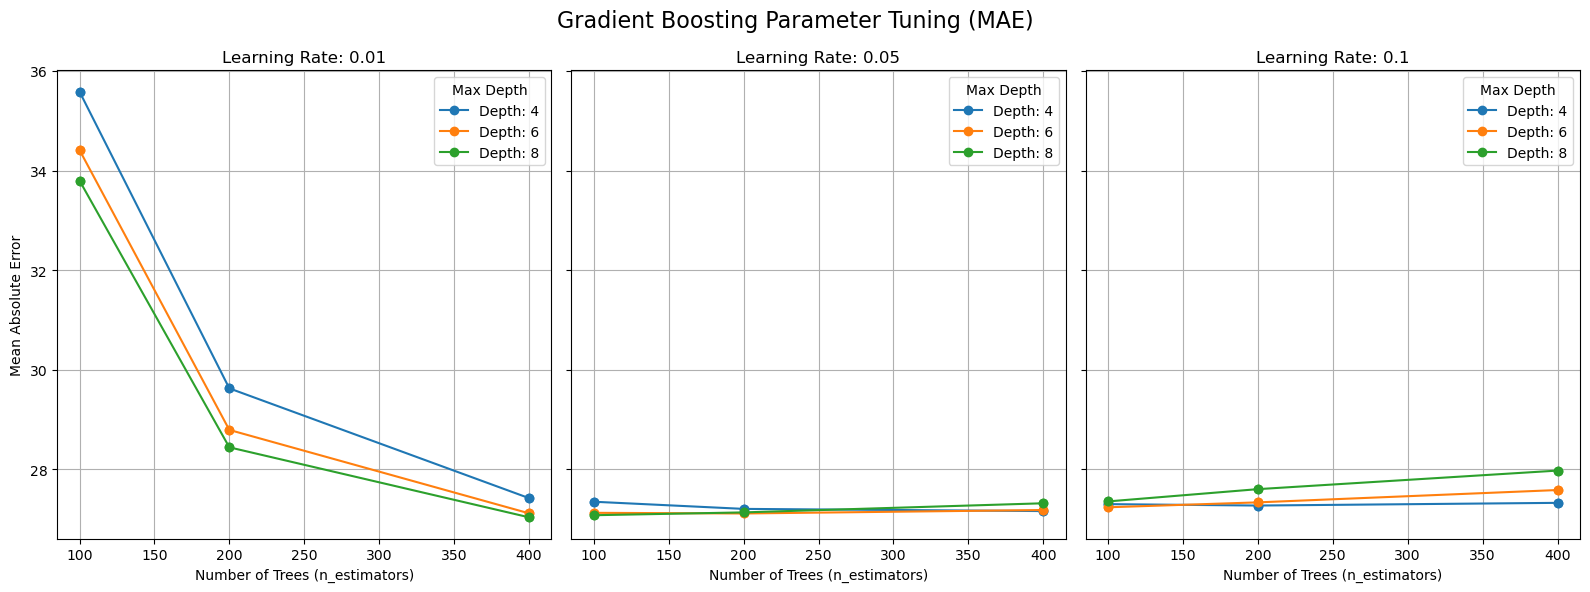

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 400}
Best MAE & n_MAE Score: 27.03317222139925 | 0.07488413357728324


In [948]:
#Plotting & printing results gbr
fig, axes = plt.subplots(1, len(param_grid_gbr['learning_rate']), figsize=(16, 6), sharey=True)
for i, learning_rate in enumerate(param_grid_gbr['learning_rate']):
    ax = axes[i]  
    for max_depth in param_grid_gbr['max_depth']:
        mask = (mae_results_gbr['param_learning_rate'] == learning_rate) & (mae_results_gbr['param_max_depth'] == max_depth)
        subset = mae_results_gbr[mask]
        mae_scores = -subset['mean_test_score'] 
        n_estimators_values = subset['param_n_estimators'] 
        sorted_indices = n_estimators_values.argsort()
        n_estimators_values = n_estimators_values.iloc[sorted_indices]
        mae_scores = mae_scores.iloc[sorted_indices]
        ax.plot(n_estimators_values, mae_scores, marker='o', label=f'Depth: {max_depth}')
    ax.grid(True)
    ax.set_xlabel('Number of Trees (n_estimators)')
    ax.set_title(f'Learning Rate: {learning_rate}')
    if i == 0:
        ax.set_ylabel('Mean Absolute Error')
    ax.legend(title='Max Depth')
fig.suptitle('Gradient Boosting Parameter Tuning (MAE)', fontsize=16), plt.tight_layout(), plt.show()

print(f"Best Parameters for Gradient Boosting: {grid_search_mae_gbr.best_params_}")
print(f"Best MAE & n_MAE Score: {best_score_mae_gbr} | {best_score_mae_gbr/range_rul}")

After running the following model, the Gradient Boosting results show that the best model was achieved with a learning rate of 0.01, max depth of 8, and 400 trees, yielding the lowest MAE of 27.0331 and n-MAE of 0.07488. Lower learning rates (0.01) combined with deeper trees consistently improved performance, with significant error reductions as the number of trees increased, especially from 100 to 400. In contrast, higher learning rates (0.1) showed minimal improvements with more trees and seemed to cause the model to converge too quickly, limiting the overall performance as training error would actually rise when the number of trees were increased.

The findings suggest that deeper trees (max depth 8) are better suited for capturing complex patterns, especially at lower learning rates, where the model learns gradually. Shallower trees and higher learning rates, while leading to faster convergence, do not provide as much improvement and may result in less optimal models. Overall, the best balance between complexity and performance was found with a lower learning rate, more trees, and a deeper model.
___

### Support Vector Machine Model

The Support Vector Machine model will be tuned on the following hyperparamters:
- **Regularization Parameter:** Is inversely proportional to the threshold width, a larger C aims to reduce training error by minimizing the width
- **Gamma:** Controls how much curvature is in the decision boundary, where lower gamma values are smoother and generalized
- **Kernel:** Defines how the input data is transformed to a higher-dimensional space to fit complex relationships

In [861]:
from sklearn.svm import SVR
#Defining SVR model & tuning parameters
svr_model = SVR()
param_grid_svr = {
    'C': [.01, .1, 1, 10, 20, 50, 100],
    'gamma': [10, 1, .1, .01],
    'kernel': ['rbf']
}
#Grid search for MAE value & Fit the grid search to the data
grid_search_mae_svr = GridSearchCV(svr_model, param_grid_svr, cv=10, scoring='neg_mean_absolute_error')
grid_search_mae_svr.fit(X_train_scaled, y_train)

#Calculate & extract the results for plotting MAE
best_score_mae_svr = -grid_search_mae_svr.best_score_
mae_results_svr = pd.DataFrame(grid_search_mae_svr.cv_results_)

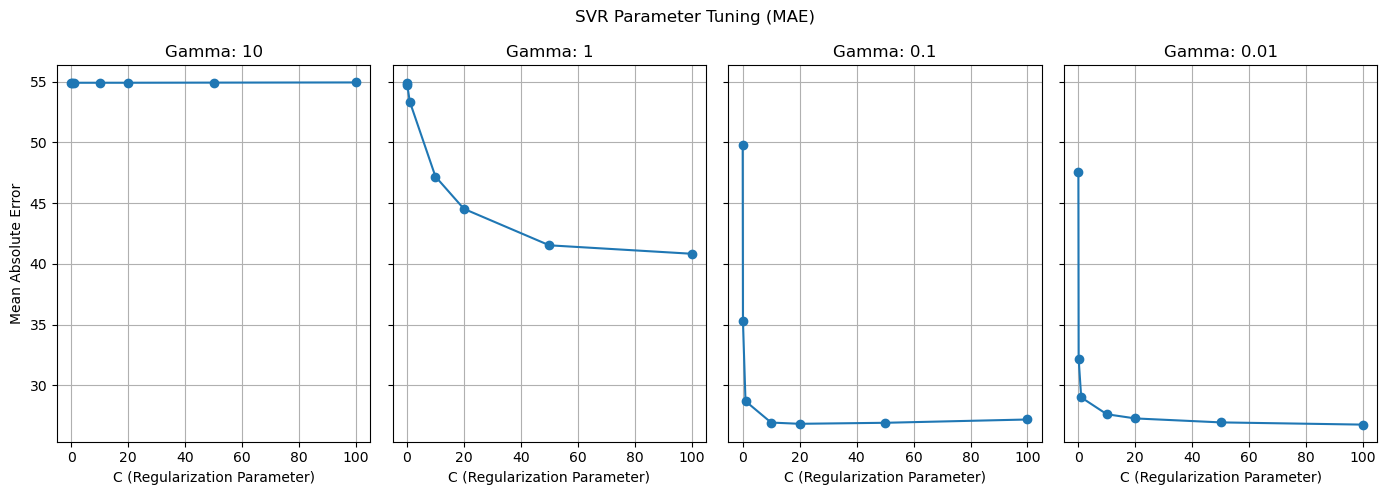

Best Parameters for SVR: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best MAE & n-MAE Score: 26.777151548161424 | 0.07417493503645824


In [885]:
#Plotting & printing results
fig, axes = plt.subplots(1, len(param_grid_svr['gamma']), figsize=(14, 5), sharey=True)
for i, gamma in enumerate(param_grid_svr['gamma']):
    ax = axes[i]  
    mask = (mae_results_svr['param_gamma'] == gamma)
    subset = mae_results_svr[mask]
    mae_scores = -subset['mean_test_score']  
    C_values = subset['param_C']  
    ax.plot(C_values, mae_scores, marker='o', label=f'Gamma: {gamma}')
    ax.grid(True)
    ax.set_xlabel('C (Regularization Parameter)')
    ax.set_title(f'Gamma: {gamma}')
    if i == 0:
        ax.set_ylabel('Mean Absolute Error')
fig.suptitle('SVR Parameter Tuning (MAE)')
plt.tight_layout(), plt.show()

print(f"Best Parameters for SVR: {grid_search_mae_svr.best_params_}")
print(f"Best MAE & n-MAE Score: {best_score_mae_svr} | {best_score_mae_svr/range_rul}")

After running our Support Vector Regression model (SVR), the results indicate that the best performance was achieved with a C value of 100, gamma of 0.01, and the RBF kernel, yielding a MAE of 26.7771 and n-MAE of 0.07417. The graphs above suggests that lower gamma values (0.1 and 0.01), combined with larger C values significantly reduce the Mean Absolute Error (MAE), as the model becomes more flexible and captures the data patterns much better. Another key point, when gamma is 0.01, the model quickly reaches "optimal" performance at lower C values, stabilizing around its lowest error score much sooner than higher gamma values. Additionally, higher gamma values (1 and 10) resulted in higher MAE across all C values, indicating that the model is overfitting and unable to generalize well to the data. This shows that for our SVR model, low gamma values allow the model to better generalize with a sufficient number of support vectors, while higher regularization values (C = 100) help control the tradeoff between bias and variance. Overall, the combination of gamma = 0.01 and C = 100 provided the most balanced model with the lowest MAE.
____

## Model Results

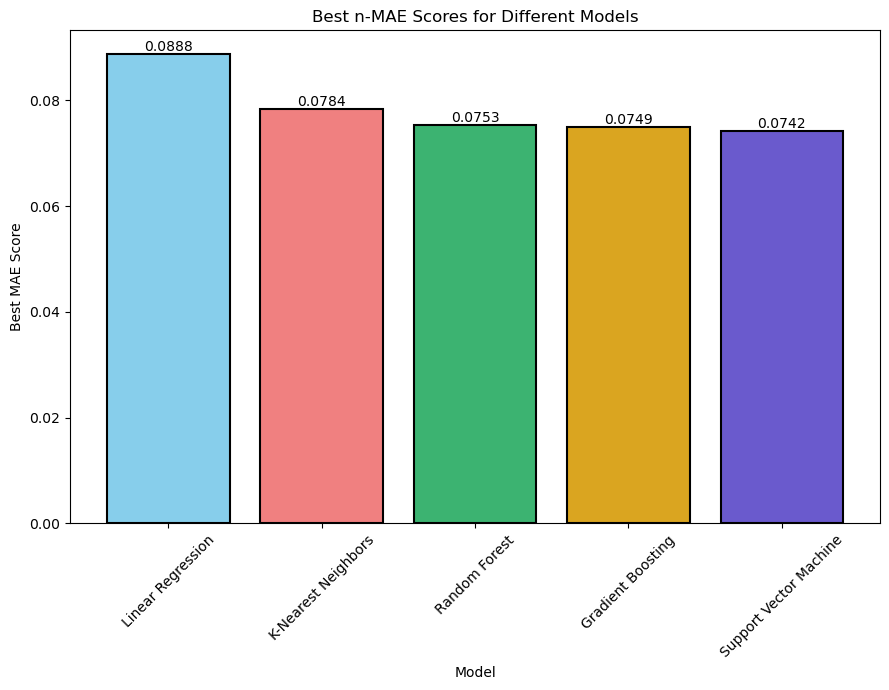

In [966]:
#Plot Model n-MAE scores
best_mae_scores = {
    'Linear Regression': mae_cv_scores_lr.mean()/range_rul,
    'K-Nearest Neighbors': best_score_mae_knn/range_rul,  
    'Random Forest': best_score_mae_rf/range_rul,  
    'Gradient Boosting': best_score_mae_gbr/range_rul,
    'Support Vector Machine': best_score_mae_svr/range_rul  
}

plt.figure(figsize=(9, 7)), plt.xlabel('Model');
bars = plt.bar(best_mae_scores.keys(), best_mae_scores.values(), alpha = 1, color=['#87CEEB', '#F08080', '#3CB371', '#DAA520', '#6A5ACD'], edgecolor='black', linewidth=1.5)
plt.bar_label(bars, fmt='%.4f', label_type='edge')
plt.ylabel('Best MAE Score'), plt.title('Best n-MAE Scores for Different Models'), plt.xticks(rotation=45), plt.tight_layout();

After running all models and their respective tuned parameters, our **SVM model** with the following parameters **{C: 100, gamma: 0.01, kernel: 'rbf'}** achieved the lowest training set score with a n-MAE value of .0742 and MAE of roughly 26.78 RUL cycles. While this model achieve the lowest **training error score**, it is important to notice that this doesn't automatically qualify it as the **best** model. One major concern is the potential for overfitting, particularly with models like SVMs that are highly sensitive to hyperparameters such as C and gamma. A high value of C (100 in this case) reduces regularization, allowing the model to fit the training data more closely, while a low gamma (0.01) results in a more complex decision boundary. While this combination minimizes training error, it can also lead to the model fitting noise in the data, which may negatively affect its performance on unseen test data. As a result, the model could significantly degrade when deployed in a real-world scenario or tested on new data. It's crucial to monitor the test set performance to confirm whether this SVM model generalizes well or if the low training error is misleading. For our final test below, we'll be evaluating the performance of the top two models.
____

### Evaluation of Two Best Models: Support Vector Machine & Gradient Boosting Trees

In [1020]:
#Define 2nd best model, fit & predict
best_gbr_model = GradientBoostingRegressor(n_estimators=400, learning_rate=0.01, max_depth=8, random_state=3)
best_gbr_model.fit(X_train_scaled, y_train)
y_pred_test = best_gbr_model.predict(X_test_scaled)

#Calculate the MAE and n-MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
n_mae_test = mae_test / range_rul 

MAE on the Test Set: 27.2479
n-MAE on the Test Set: 0.0755


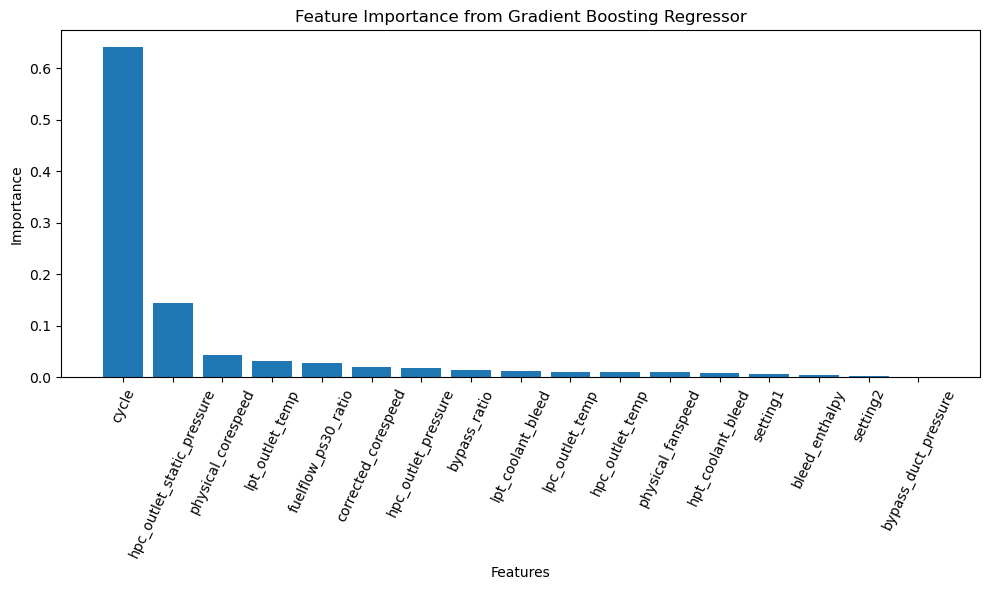

In [1021]:
#Print results & Plot feature importance
print(f'MAE on the Test Set: {mae_test:.4f}')
print(f'n-MAE on the Test Set: {n_mae_test:.4f}')

feature_importances = best_gbr_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6)), plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=65)
plt.title('Feature Importance from Gradient Boosting Regressor'), plt.xlabel('Features'), plt.ylabel('Importance'), plt.tight_layout();

In [992]:
from sklearn.metrics import mean_absolute_error
#Define best model, fit & predict
best_model = SVR(C = 100, gamma = .01, kernel = 'rbf')
best_model.fit(X_train_scaled, y_train)
y_pred_test = best_model.predict(X_test_scaled)

#Define & print the results
mae_test = mean_absolute_error(y_test, y_pred_test)
n_mae_test = mae_test / range_rul 

print(f'MAE on the Test Set: {mae_test:.4f}')
print(f'n-MAE on the Test Set: {n_mae_test:.4f}')

MAE on the Test Set: 26.7158
n-MAE on the Test Set: 0.0740


After fitting both our SVM & GBR model to the entire training set and evaluating the model's performance on the testing dataset, we achieved an MAE of 27.2479 and 26.7158 respectively (and an n-MAE of 0.0740 0.0755). These results are closely aligned with the models' performance on the training set as well. The small difference between training and testing error indicates that the models generalize well to unseen data and have not overfit the training set, which is a positive indicator of these models' robustness.
____

## Report Conclusions
In this project, we aimed to develop a predictive model to estimate the Remaining Useful Life (RUL) of aircraft engines based on a collection of multivariate time-series data from NASA. Several machine learning models and their respective performances were explored: Linear Regression, K-Nearest Neighbors (KNN), Random Forest (RF), Gradient Boosting Trees (GBR), and Support Vector Regression (SVR). After thorough hyperparameter tuning and cross-validation, our SVR & GBR models emerged as the best performers, exceling in training error (which would carry onto testing error as well). We reached a final model testing error of roughly 26 RUL cycles. While these results weren't ideal, their performance against availible features and the nature of the dataset still demonstrates the models' robustness given the inherent complexitiy of predicting RUL. The error rate still fell within ~7% of possible outcome values despite high-performing outliers skewing the possible results. Additionally, although the SVR & GBR model performed well, its reliance on hyperparameter tuning and high computational costs for larger datasets may limit its scalability in real-time or large-scale applications.

There were many areas for possible improvement in model performance & evaluation within this particular report. First were the hyperparameters upon which the models were tuned. Due to computational and time limitations on my end, parameters were often limited in scope, though within a relatively appropriate range. Ensemble methods were especially time-consuming, often taking hours to compute all possible parameters. Hypothetically, there may be some performance improvements left on the table for increased depth (>10) and a higher amount of decision trees (>400). Another consideration is the time series nature of the dataset. Since each cycle was portrayed as its own unique instance, independent of its previous cycle, the models were unable to capture the change in sensor readings from that engines previous state. A possible way to improve the models would be to feature engineer variables that take this into account, measuring the sensors' deviation from its average/starting value. Another approach could be the use of even more powerful models such as a neural network - combined with the aforementioned features - that could perhaps capture the complexities within the dataset even more accurately. Finally, as mentioned in the "Evaluation Metrics Summary" portion above: our metrics weigh over/under predictions the same. This is important to consider as over-predicting an engine's RUL can have disastrous implication to the lives onboard that plane.

For key findings on what this tells us about airport engine degradation, we see that certain features stand out as critical predictors of Remaning Useful Life (RUL). Besides cycle count (which was obvious as it was tied to the operational time of the engine), we see "HPC outlet static pressure", "physical corespeed", and "LPT outlet temp" as key features in indicating rising engine wear. Meanwhile, we see "bleed enthalpy" and "bypass duct pressure" as having minimal impact on explaining the variability within RUL. This leads to a couple implications for future aircraft maintence: focusing on the most influential features—such as pressure and temperature metrics—can lead to more targeted and efficient maintenance practices. These findings support the adoption that balances a condition-based maintenance approach & fixed schedules. By having interventions triggered by actual engine health (that still takes into consideration operational time), airlines may improve both safety and cost-effectiveness. While there is still much to be desired in improving upon model accuracy there is a clear path forward for further enhancing performance. Despite the challenges, I hope this project has laid a strong foundation for predictive maintenance models in aviation, and future work that incorporates these refinements could lead to even more accurate and meaningful predictions of engine degradation.

## **References & Acknowledgements**

#### Data:
- Prognostics Center of Excellence (PCoE) Dataset. Published by NASA, 2016. Provided by Christopher Teubert. Available at: **https://www.nasa.gov/content/prognostics-center-of-excellence/.**

#### Other:
- The book: *An Introduction to Statistical Learning with Application in Python* was crucial in providing necessary guidelines for this project. The link can be found __[here](https://www.statlearning.com/)__
- Documentation for MatPlotlib.pyplot was referenced __[here](https://matplotlib.org/stable/gallery/index.html)__.
- Documentation for Pandas functions were referenced __[here](https://pandas.pydata.org/pandas-docs/stable/index.html)__
- Documentation for Model building can be found __[here](https://scikit-learn.org/stable/supervised_learning.html)__
- Other general inquiries for debugging were answered on GeeksforGeeks, StackOverflow, and ChatGPT.
- General industry information & inspiration from __[here](https://www.youtube.com/watch?v=pzqJRGGOWc0&ab_channel=CNBC)__
- References to record airport traffic can be found __[here](https://www.tsa.gov/news/press/releases/2024/06/24/tsa-breaks-record-most-individuals-screened-single-day-readies)__
